# Random Forest

# Import Dependencies

In [ ]:
import pandas as pd
import numpy as np

from config import CSV_FILE_URL
import joblib

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import precision_recall_curve, roc_auc_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.ensemble import RandomForestClassifier

# Read the CSV

In [ ]:
# Read the CSV file into a dataframe
df = pd.read_csv(CSV_FILE_URL)
df.shape

# Data Cleaning¶
Checking to see if there are any null values in the dataset.

In [ ]:
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')

# Drop the null rows
df = df.dropna()
df.shape

It could be seen that there are no null values in the dataset.

# Data Exploration

Checking Data distribution w.r.t Target feature

In [4]:
df.groupby('Class').count()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,284315,284315,284315,284315,284315,284315,284315,284315,284315,284315,...,284315,284315,284315,284315,284315,284315,284315,284315,284315,284315
1,492,492,492,492,492,492,492,492,492,492,...,492,492,492,492,492,492,492,492,492,492


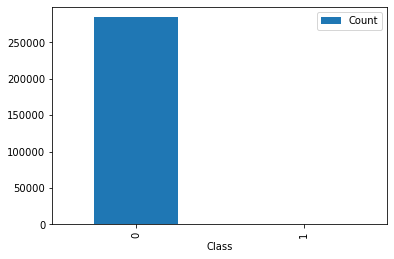

In [6]:
grouped_df = df[['Class','Time']].groupby('Class').count()
grouped_df = grouped_df.rename(columns={"Time":"Count"})
grouped_df.plot(kind="bar")

It is evident from the above plot that data is **highly imbalanced**. The dataset has only 492 fraudulent transactions out of a total of 284807 transactions, which is a mere 0.17%.

# Defining features

Defining the predictor features and the target feature.

In [7]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [8]:
# Selecting predictor features. This will be used as x values.
selected_features = df[['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']]
selected_features.shape

(284807, 30)

In [9]:
# Defining predictor and target features to X and y respectively.
# Note: Sklearn requires a two-dimensional array of values
# so we use reshape to create this

X = selected_features
y = df[['Class']].values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)

Shape:  (284807, 30) (284807, 1)


# Create a Train Test Split¶

Using Class for the y values (target feature)

In [10]:
# Using sklearn's `train_test_split` to split the data into training and testing datasets

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [11]:
print("Shape: ", X_train.shape, y_train.shape, X_test.shape, y_test.shape)

Shape:  (213605, 30) (213605, 1) (71202, 30) (71202, 1)


# Data Pre-processing

Scale the data using the MinMaxScaler

In [12]:
X_minmax = MinMaxScaler().fit(X_train)

X_train_scaled = X_minmax.transform(X_train)
X_test_scaled = X_minmax.transform(X_test)

# Random Forest Classifier Model¶
Train the Model

In [13]:
randomTreeModel = RandomForestClassifier(n_estimators=200)
randomTreeModel

RandomForestClassifier(n_estimators=200)

In [14]:
randomTreeModel.fit(X_train_scaled, y_train.flatten())

RandomForestClassifier(n_estimators=200)

In [15]:
print(f"Training Data Score: {randomTreeModel.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {randomTreeModel.score(X_test_scaled, y_test)}")

Training Data Score: 1.0
Testing Data Score: 0.9995786635206876


In [16]:
# Make predictions with the model
randomTreePredictions = randomTreeModel.predict(X_test_scaled)

In [17]:
randomTreePredictProba = randomTreeModel.predict_proba(X_test_scaled)[:,1]

Random Forest Classifier
Accuracy:  0.9995786635206876
Precision:  0.9191919191919192
Recall:  0.8053097345132744
F1-Score:  0.8584905660377359
AUC score:  0.9025985997609627
                precision    recall  f1-score   support

Non Fraudulent       1.00      1.00      1.00     71089
    Fraudulent       0.92      0.81      0.86       113

      accuracy                           1.00     71202
     macro avg       0.96      0.90      0.93     71202
  weighted avg       1.00      1.00      1.00     71202



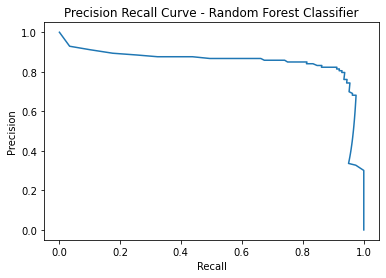

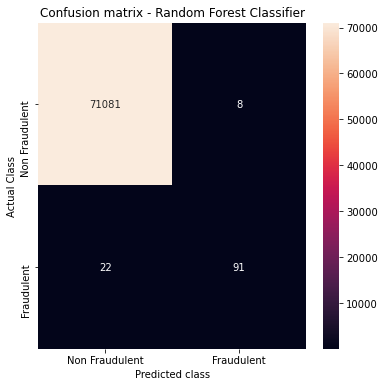

In [18]:
print("Random Forest Classifier")
print("========================")
print("Accuracy: ",accuracy_score(y_test.flatten(), randomTreePredictions)) 
print("Precision: ",precision_score(y_test.flatten(), randomTreePredictions))
print("Recall: ",recall_score(y_test.flatten(), randomTreePredictions))
print("F1-Score: ",f1_score(y_test.flatten(), randomTreePredictions))
print("AUC score: ",roc_auc_score(y_test.flatten(), randomTreePredictions))
print(classification_report(y_test.flatten(), randomTreePredictions,
                            target_names=["Non Fraudulent", "Fraudulent"]))
p, r, t = precision_recall_curve(y_test.flatten(), randomTreePredictProba)
plt.plot(p, r)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve - Random Forest Classifier')
confusionMatrix = confusion_matrix(y_test.flatten(), randomTreePredictions) 
plt.figure(figsize =(6, 6)) 
sns.heatmap(confusionMatrix, xticklabels = ['Non Fraudulent', 'Fraudulent'],  
            yticklabels = ['Non Fraudulent', 'Fraudulent'], annot = True, fmt ="d"); 
plt.title("Confusion matrix - Random Forest Classifier") 
plt.ylabel('Actual Class') 
plt.xlabel('Predicted class') 
plt.show()

# Hyperparameter Tuning¶
Use GridSearchCV to tune the model's parameters

In [19]:
randomTreeModel.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [20]:
# Create the GridSearchCV model
# Create the GridSearch estimator along with a parameter object containing the values to adjust
randomTreeParamGrid = {'n_estimators': [100, 200, 300, 400, 500],
                         'criterion': ['gini','entropy'],
                         'class_weight': [{0:99, 1:1}, "balanced","balanced_subsample", None],
                         'max_features': ['auto','sqrt','log2',None],
                        }
randomTreeGrid = GridSearchCV(randomTreeModel, randomTreeParamGrid, verbose=3)

In [ ]:
# Train the model with GridSearch
randomTreeGrid.fit(X_train_scaled, y_train.flatten())

Fitting 5 folds for each of 160 candidates, totalling 800 fits
[CV] class_weight={0: 99, 1: 1}, criterion=gini, max_features=auto, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  class_weight={0: 99, 1: 1}, criterion=gini, max_features=auto, n_estimators=100, score=1.000, total= 2.7min
[CV] class_weight={0: 99, 1: 1}, criterion=gini, max_features=auto, n_estimators=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.7min remaining:    0.0s


[CV]  class_weight={0: 99, 1: 1}, criterion=gini, max_features=auto, n_estimators=100, score=0.999, total= 2.6min
[CV] class_weight={0: 99, 1: 1}, criterion=gini, max_features=auto, n_estimators=100 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  5.3min remaining:    0.0s


[CV]  class_weight={0: 99, 1: 1}, criterion=gini, max_features=auto, n_estimators=100, score=0.999, total= 2.6min
[CV] class_weight={0: 99, 1: 1}, criterion=gini, max_features=auto, n_estimators=100 
[CV]  class_weight={0: 99, 1: 1}, criterion=gini, max_features=auto, n_estimators=100, score=1.000, total= 2.7min
[CV] class_weight={0: 99, 1: 1}, criterion=gini, max_features=auto, n_estimators=100 
[CV]  class_weight={0: 99, 1: 1}, criterion=gini, max_features=auto, n_estimators=100, score=1.000, total= 2.6min
[CV] class_weight={0: 99, 1: 1}, criterion=gini, max_features=auto, n_estimators=200 
[CV]  class_weight={0: 99, 1: 1}, criterion=gini, max_features=auto, n_estimators=200, score=1.000, total= 5.6min
[CV] class_weight={0: 99, 1: 1}, criterion=gini, max_features=auto, n_estimators=200 
[CV]  class_weight={0: 99, 1: 1}, criterion=gini, max_features=auto, n_estimators=200, score=0.999, total= 5.1min
[CV] class_weight={0: 99, 1: 1}, criterion=gini, max_features=auto, n_estimators=200 


In [ ]:
print(randomTreeGrid.best_params_)
print(randomTreeGrid.best_score_)

In [ ]:
# Make predictions with the hyperparameter tuned model
randomTreeGridPredictions = randomTreeGrid.predict(X_test_scaled)

In [ ]:
# Print classification report
print(classification_report(y_test.flatten(), randomTreeGridPredictions,
                            target_names=["Non Fraudulent", "Fraudulent"]))

In [ ]:
hypertunedrandomTreeModel = randomTreeClassifier(n_estimators = ,criterion = 'gini', max_features = , class_weight = '')
hypertunedrandomTreeModel

In [ ]:
hypertunedrandomTreeTreeModel.fit(X_train_scaled, y_train.flatten())

In [ ]:
print(f"Training Data Score: {hypertunedrandomTreeModel.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {hypertunedrandomTreeModel.score(X_test_scaled, y_test)}")

In [ ]:
hypertunedrandomTreeModelPredictions = hypertunedrandomTreeModel.predict(X_test_scaled)

In [ ]:
hypertunedrandomTreeModelPredictProba = hypertunedrandomTreeModel.predict_proba(X_test_scaled)[:,1]

In [ ]:
# Calculate classification report
print(classification_report(y_test.flatten(), hypertunedrandomTreeModelPredictions,
                            target_names=["Non Fraudulent", "Fraudulent"]))

In [ ]:
print("Random Forest Classifier")
print("========================")
print("Accuracy: ",accuracy_score(y_test.flatten(), randomTreePredictions)) 
print("Precision: ",precision_score(y_test.flatten(), randomTreePredictions))
print("Recall: ",recall_score(y_test.flatten(), randomTreePredictions))
print("F1-Score: ",f1_score(y_test.flatten(), randomTreePredictions))
print("AUC score: ",roc_auc_score(y_test.flatten(), randomTreePredictions))
print(classification_report(y_test.flatten(), randomTreePredictions,
                            target_names=["Non Fraudulent", "Fraudulent"]))
p, r, t = precision_recall_curve(y_test.flatten(), randomTreePredictProba)
plt.plot(p, r)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve - Random Forest Classifier')
confusionMatrix = confusion_matrix(y_test.flatten(), randomTreePredictions) 
plt.figure(figsize =(6, 6)) 
sns.heatmap(confusionMatrix, xticklabels = ['Non Fraudulent', 'Fraudulent'],  
            yticklabels = ['Non Fraudulent', 'Fraudulent'], annot = True, fmt ="d"); 
plt.title("Confusion matrix - Random Forest Classifier") 
plt.ylabel('Actual Class') 
plt.xlabel('Predicted class') 
plt.show()

# Feature Selection

In [ ]:
feature_names = selected_features.columns
sorted(zip(hypertunedrandomTreeModel.feature_importances_, feature_names), reverse=True)

# Choosing Top features

In [ ]:
# Set top features. This will be used as x values.
top_features = df[[ 
'V17',
'V14',
'V10',
'V12',
'V15',
'V27',
'V3',
'V16',
'V18',
'V7',
'V1',
'V24',
'V8',
'V4',
'V6',
'V26',
'V20',
'V5',
'V21',
'V19',
'V23',
]]

top_features.head(1)

# Create a Train Test Split¶
Use Class for the y values

In [ ]:
# Assign the data to X and y
# Note: Sklearn requires a two-dimensional array of values
# so we use reshape to create this

top_X = top_features
top_y = df[['Class']].values.reshape(-1, 1)

print("Shape: ", top_X.shape, top_y.shape)

In [ ]:
top_X_train, top_X_test, top_y_train, top_y_test = train_test_split(top_X, top_y, random_state=42)

In [ ]:
print(top_X_train.shape,top_X_test.shape,top_y_train.shape, top_y_test.shape)

# Pre-processing
Scale the data using the MinMaxScaler

In [ ]:
top_X_minmax = MinMaxScaler().fit(top_X_train)

top_X_train_scaled = top_X_minmax.transform(top_X_train)
top_X_test_scaled = top_X_minmax.transform(top_X_test)

In [ ]:
X_scaler = MinMaxScaler().fit(X_train)

X_train_scaler = X_scaler.transform(X_train)
X_test_scaler = X_scaler.transform(X_test)

# Decision Tree Model with Top features¶
Train the Model

In [ ]:
top_randomTreeModel = RandomTreeClassifier()
top_randomTreeModel

In [ ]:
top_randomTreeModel.fit(top_X_train_scaled, top_y_train.flatten())

In [ ]:
top_randomTreeModel.fit(top_X_train_scaled, top_y_train.flatten())

In [ ]:
# Make predictions
top_randomTreePredictions = top_randomTreeModel.predict(top_X_test_scaled)

In [ ]:
top_randomTreePredictProba = top_randomTreeModel.predict_proba(top_X_test_scaled)[:,1]

In [ ]:
print(classification_report(top_y_test.flatten(), top_randomTreePredictions,
                            target_names=["Non Fraudulent", "Fraudulent"]))
print("Accuracy:", accuracy_score(top_y_test.flatten(), top_randomTreePredictions))

In [ ]:
print("Random Tree Classifier")
print("========================")
print("Accuracy: ",accuracy_score(y_test.flatten(), hypertunedrandomTreeModelPredictions)) 
print("Precision: ",precision_score(y_test.flatten(), hypertunedrandomTreeModelPredictions))
print("Recall: ",recall_score(y_test.flatten(), hypertunedrandomTreeModelPredictions))
print("F1-Score: ",f1_score(y_test.flatten(), hypertunedrandomTreeModelPredictions))
print("AUC score: ",roc_auc_score(y_test.flatten(), hypertunedrandomTreeModelPredictions))
print(classification_report(y_test.flatten(), hypertunedrandomTreeModelPredictions,
                            target_names=["Non Fraudulent", "Fraudulent"]))

p, r, t = precision_recall_curve(y_test.flatten(), hypertunedrandomTreeModelPredictProba)
plt.plot(p, r)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve - Decision Tree Classifier')

confusionMatrix = confusion_matrix(y_test.flatten(), hypertunedrandomTreeModelPredictions) 
plt.figure(figsize =(6, 6)) 
sns.heatmap(confusionMatrix, xticklabels = ['Non Fraudulent', 'Fraudulent'],  
            yticklabels = ['Non Fraudulent', 'Fraudulent'], annot = True, fmt ="d"); 
plt.title("Confusion matrix - Decision Tree Classifier") 
plt.ylabel('Actual Class') 
plt.xlabel('Predicted class') 
plt.show()

# Hyperparameter Tuning
Use GridSearchCV to tune the model's parameters

In [ ]:
top_decisionTreeModel.get_params().keys()

In [ ]:
# Create the GridSearchCV model
# Create the GridSearch estimator along with a parameter object containing the values to adjust
top_randomTreeParamGrid = {'criterion':['gini', 'entropy'],
                             'splitter': ['best','random'],
                             'max_depth': [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}
top_randomTreeGrid = GridSearchCV(top_randomTreeModel, top_randomTreeParamGrid, verbose=3)

In [ ]:
# Train the model with GridSearch
top_randomTreeGrid.fit(top_X_train_scaled, top_y_train.flatten())

In [ ]:
print(top_randomTreeGrid.best_params_)
print(top_randomTreeGrid.best_score_)

In [ ]:
# Make predictions with the hyperparameter tuned model
top_randomTreeGridPredictions = top_randomTreeGrid.predict(top_X_test_scaled)

In [ ]:
print(classification_report(top_y_test.flatten(), top_randomTreeGridPredictions,
                            target_names=["Non Fraudulent", "Fraudulent"]))

In [ ]:
top_hypertunedrandomTreeModel = randomTreeClassifier(criterion = 'entropy', max_depth = 7, splitter = 'random')
top_hypertunedrandomTreeModel

In [ ]:
top_hypertunedrandomTreeModel.fit(top_X_train_scaled, top_y_train.flatten())

In [ ]:
print(f"Training Data Score: {top_hypertunedrandomTreeModel.score(top_X_train_scaled, top_y_train)}")
print(f"Testing Data Score: {top_hypertunedrandomTreeModel.score(top_X_test_scaled, top_y_test)}")

In [ ]:
top_hypertunedrandomTreeModelPredictions = top_hypertunedrandomTreeModel.predict(top_X_test_scaled)

In [ ]:
top_hypertunedrandomTreeModelPredictProba = top_hypertunedrandomTreeModel.predict_proba(top_X_test_scaled)[:,1]

In [ ]:
print(classification_report(top_y_test.flatten(), top_hypertunedrandomTreeModelPredictions,
                            target_names=["Non Fraudulent", "Fraudulent"]))

In [ ]:
print("Random Forest Classifier")
print("========================")
print("Accuracy: ",accuracy_score(y_test.flatten(), randomTreePredictions)) 
print("Precision: ",precision_score(y_test.flatten(), randomTreePredictions))
print("Recall: ",recall_score(y_test.flatten(), randomTreePredictions))
print("F1-Score: ",f1_score(y_test.flatten(), randomTreePredictions))
print("AUC score: ",roc_auc_score(y_test.flatten(), randomTreePredictions))
print(classification_report(y_test.flatten(), randomTreePredictions,
                            target_names=["Non Fraudulent", "Fraudulent"]))
p, r, t = precision_recall_curve(y_test.flatten(), randomTreePredictProba)
plt.plot(p, r)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve - Random Forest Classifier')
confusionMatrix = confusion_matrix(y_test.flatten(), randomTreePredictions) 
plt.figure(figsize =(6, 6)) 
sns.heatmap(confusionMatrix, xticklabels = ['Non Fraudulent', 'Fraudulent'],  
            yticklabels = ['Non Fraudulent', 'Fraudulent'], annot = True, fmt ="d"); 
plt.title("Confusion matrix - Random Forest Classifier") 
plt.ylabel('Actual Class') 
plt.xlabel('Predicted class') 
plt.show()

# Save the Model¶

In [ ]:
filename = 'RandomTreeClassifierModel.sav'
joblib.dump(hypertunedRandomTreeModel, filename)